In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('data.csv')

In [70]:
data

,x,y
0,15,95
1,10,130
2,13,88
3,14,90
4,15,78
5,16,92
6,10,90
7,10,82
8,11,88
9,13,82


In [71]:
X=data.iloc[:,0].values
y=data.iloc[:,1].values

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lin=LinearRegression()

In [10]:
lin.fit(X[:,np.newaxis],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#fit polynomial regresstion to this data

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
poly=PolynomialFeatures(degree=4)

In [18]:
X_poly=poly.fit_transform(X[:,np.newaxis])

In [19]:
poly.fit(X_poly,y)

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False,
                   order='C')

In [20]:
lin2=LinearRegression()

In [21]:
lin2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
#Lets visualise the linear regression results


In [23]:
import matplotlib.pyplot as plt

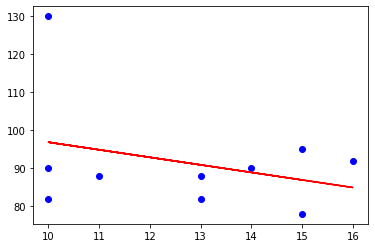

In [26]:
plt.scatter(X,y, color='blue')
plt.plot(X,lin.predict(X[:,np.newaxis]),color='red')

In [27]:
#Visualize using the polynomial features

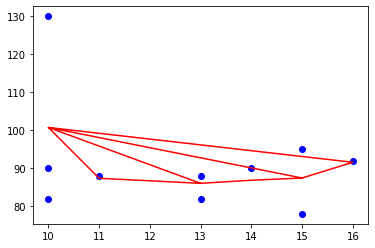

In [29]:
plt.scatter(X,y,color='blue')
plt.plot(X,lin2.predict(poly.fit_transform(X[:,np.newaxis])),color='red')

In [34]:
input=np.array([100])
input=input[:,np.newaxis]
lin.predict(input)

array([-81.82952183])

In [36]:
lin2.predict(poly.fit_transform(input))

array([8772001.65371213])

In [37]:
newdata=pd.read_csv('TestData.csv')

In [72]:
newdata

,State,Age,Salary,Donated PMCares
0,JK,34.0,72000.0,No
1,HP,29.0,48000.0,Yes
2,MP,34.0,54000.0,No
3,JK,68.0,61000.0,No
4,JK,40.0,NaN,Yes
5,ML,39.0,58000.0,Yes
6,HP,NaN,52000.0,No
7,HP,36.0,79000.0,Yes
8,MP,42.0,83000.0,No
9,JK,66.0,67000.0,Yes


In [86]:
X=newdata.iloc[:,:-1].values
y=newdata.iloc[:,3].values

In [41]:
from sklearn.impute import SimpleImputer

In [43]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')

In [87]:
imputer=imputer.fit(X[:,1:3])

In [88]:
X[:,1:3]=imputer.transform(X[:,1:3])

In [89]:
X

array([['JK', 34.0, 72000.0],
       ['HP', 29.0, 48000.0],
       ['MP', 34.0, 54000.0],
       ['JK', 68.0, 61000.0],
       ['JK', 40.0, 63777.77777777778],
       ['ML', 39.0, 58000.0],
       ['HP', 43.111111111111114, 52000.0],
       ['HP', 36.0, 79000.0],
       ['MP', 42.0, 83000.0],
       ['JK', 66.0, 67000.0]], dtype=object)

In [56]:
#Lets encode the categorical values

In [57]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [90]:
labelencoder=LabelEncoder()

In [92]:
X[:,0]=labelencoder.fit_transform(X[:,0])

In [93]:
onehotencoder=OneHotEncoder(handle_unknown='ignore')

In [96]:
X_encod=onehotencoder.fit_transform(X[:,0:1]).toarray()

In [63]:
labelencoder_y=LabelEncoder()


In [64]:
y=labelencoder_y.fit_transform(y)

In [97]:
print(X_encod)

[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


In [67]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])